# Explaining a nlp model's layer rankings


## See the [ecco toolkit](https://ecco.readthedocs.io/en/main/){cite}`alammar-2021-ecco`


In [9]:
import warnings
warnings.filterwarnings('ignore')

from explainer.explainers import layer_rankings

In [10]:
model = 'distilgpt2'

import entry_point
explainer = entry_point.entry_point(model)


## Show rankings for the next word

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

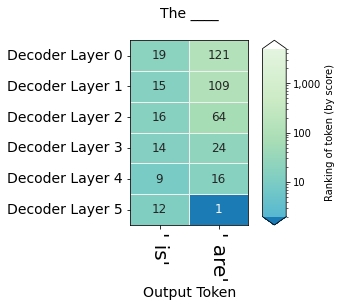

In [11]:
text = "The keys to the cabinet"
explainer(text, generate=1, do_sample=False).rankings_watch(watch=[318, 389], position=5)